<a href="https://colab.research.google.com/github/shobhitsundriyal/f_challenges/blob/master/MH_github_bug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers

     |████████████████████████████████| 1.1MB 7.1MB/s 
     |████████████████████████████████| 890kB 28.3MB/s 
     |████████████████████████████████| 3.0MB 39.1MB/s 
     |████████████████████████████████| 1.1MB 22.9MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=855c718240d81a257143bccec87953519cec5f03907484d001a51017be885dfe
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
!wget "https://tmpfiles.org/dl/86529/Embold_Participants_Dataset.zip"

--2020-10-12 15:58:32--  https://tmpfiles.org/dl/86529/Embold_Participants_Dataset.zip
Resolving tmpfiles.org (tmpfiles.org)... 172.67.195.247, 104.31.95.122, 104.31.94.122, ...
Connecting to tmpfiles.org (tmpfiles.org)|172.67.195.247|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102320961 (98M) [application/zip]
Saving to: ‘Embold_Participants_Dataset.zip’

Embold_Participants 100%[===================>]  97.58M  41.9MB/s    in 2.3s    

2020-10-12 15:58:35 (41.9 MB/s) - ‘Embold_Participants_Dataset.zip’ saved [102320961/102320961]



In [ ]:
!unzip Embold_Participants_Dataset.zip

Archive:  Embold_Participants_Dataset.zip
   creating: Embold_Participant's_Dataset/
  inflating: Embold_Participant's_Dataset/sample submission.csv  
  inflating: __MACOSX/Embold_Participant's_Dataset/._sample submission.csv  
  inflating: Embold_Participant's_Dataset/embold_train_extra.json  
  inflating: __MACOSX/Embold_Participant's_Dataset/._embold_train_extra.json  
  inflating: Embold_Participant's_Dataset/embold_test.json  
  inflating: __MACOSX/Embold_Participant's_Dataset/._embold_test.json  
  inflating: Embold_Participant's_Dataset/embold_train.json  
  inflating: __MACOSX/Embold_Participant's_Dataset/._embold_train.json  


In [ ]:
import pandas as pd
train = pd.read_json('Embold_Participants_Dataset/embold_train.json').reset_index(drop=True)
test = pd.read_json('Embold_Participants_Dataset/embold_test.json').reset_index(drop=True)
train_extra = pd.read_json('Embold_Participants_Dataset/embold_train_extra.json').reset_index(drop=True)

In [ ]:
train.head()

title  ... label
0                                  y-zoom piano roll  ...     1
1                        buggy behavior in selection  ...     0
2                                auto update feature  ...     1
3                 filter out noisy endpoints in logs  ...     1
4  enable pid on / pid off alarm actions for ardu...  ...     0

[5 rows x 3 columns]

In [ ]:
train_extra.head()

title  ... label
0                                use a 8bit typeface  ...     1
1                   implement wireless m-bus binding  ...     1
2               add multilang support for timeago.js  ...     1
3                   scaleway - seg-fault on shutdown  ...     0
4  sistema de pintura: no se guardar los nuevos p...  ...     0

[5 rows x 3 columns]

In [ ]:
test.head()

title                                               body
0  config question  path-specific environment var...  issue description or question\r \r hey @artemg...
1                                   crash indien vol                de simulator crasht als hij vol zit
2                               unable to mine rocks  sarkasmo starting today, when i hit enter  act...
3                   not all whitelists are processed  create following rules... order of creation is...
4          add ctx menu for idafree 70 and idafree 5  associated with .dll, .dll_, .exe, .exe_, .sc,...

In [ ]:
import torch
from transformers import XLMRobertaTokenizer

print(train.shape)
print(train_extra.shape)

(150000, 3)
(300000, 3)


In [ ]:
train_df = pd.concat([train, train_extra])
print(train_df.shape)
train_df.head()

(450000, 3)


title  ... label
0                                  y-zoom piano roll  ...     1
1                        buggy behavior in selection  ...     0
2                                auto update feature  ...     1
3                 filter out noisy endpoints in logs  ...     1
4  enable pid on / pid off alarm actions for ardu...  ...     0

[5 rows x 3 columns]

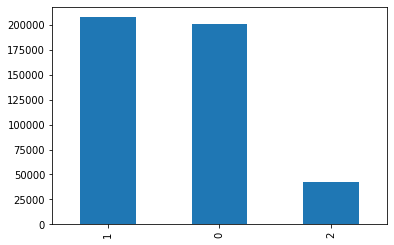

In [ ]:
pd.value_counts(train_df['label']).plot(kind='bar')

- Bug - 0
- Feature - 1
- Question - 2


In [ ]:
xlmr_tokenizer = XLMRobertaTokenizer.from_pretrained('xlm-roberta-base')

encoded_dict = []
for i, row in enumerate(train_df.iterrows()):
  print(r'{i} / 450000',)
  encoded = xlmr_tokenizer.encode_plus(row[1].title, row[1].body, max_len=512, truncate=True, return_tensors='pt')
  encoded_dict.append(encoded)

Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (760 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (532 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1003 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (1113 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (528 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (577 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (819 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000

Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (952 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1083 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword argume


{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (695 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (572 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (2915 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not 

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (547 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1258 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not 

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1200

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (630 

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (985 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1015 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (635 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified 

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (865 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1012 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (580 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (950 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (1939 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (791 > 512). Running this seq

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (559 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (527 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (2364 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1418 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (897 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1200 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1754 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not 

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1794 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (743 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (2329 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (602 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword argume

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1851 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (651 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (705 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (623 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (2400 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1990 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (610 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'tr

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (526 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (666 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (621 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (730 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (711 > 512). Running this sequence through the model will result in indexi

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1204

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000

Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,


{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (582 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (627 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (3511 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1891 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (516 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000

Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (528 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re


{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (978 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (3837 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (609 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1957 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (610 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (675 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is 

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (4084 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1355 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (526 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (712 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (578 

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (546 

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (757 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (630 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1347 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (585 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword argume

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (2049 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (689 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1108 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (658 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword argume

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (552 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified 

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (4449 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (2965 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (727 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (3065 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (807 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (744 > 512). Running this sequence through the model will result in indexing errors
Keyword argumen

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (872 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (525 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified 

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (950 > 512). Running this sequence through the model will result in indexi

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1572 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (695 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword argume

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (734 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1199 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (662 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (632 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (834 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (747 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword argumen

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (853 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (1390 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1359 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (812 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword argume

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (570 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is l

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1021 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (647 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword argume

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (2476 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (612 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified 

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (4321 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (573 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (4443 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1031 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (714 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (671 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified 

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1077 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (601 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (2035 > 512). Running this sequence through the model will result in inde

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (782 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (785 

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (2043 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1794 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword argum

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000

Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,


{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (609 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (856 > 512). Running this sequence through the model will result in index

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1237 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (670 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1407 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (2638 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (648 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (709 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000

Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is l


{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (717 

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (24914 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not 

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (1683 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1131 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (637 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (2760 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (919 > 512). Running this seq

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000

Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (634 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re


{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (2514 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1081 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not 

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (683 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (1288 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (2477 > 512). Running this sequence through the model will result in index

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (2921 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1656 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (782 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified 

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (661 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (3529 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1043 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword argum

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (522 

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000

Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,


{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (713 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (969 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (597 

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (666 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (552 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1811 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (664 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (915 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified 

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (2362 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (762 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (882 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (634 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (676 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (1114 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (533 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (623 > 512). Running this seq

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (544 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (982 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (576 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword argumen

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (887 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1521 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword argume

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (541 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (564 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (2016 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (4104 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1611 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not 

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is l

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1390 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (583 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (996 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (3586 > 512). Running this sequence through the model will result in index

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (3101 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (820 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (528 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (595 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (963 > 512). Running this sequence through the model will result in indexing errors
Keyword argumen

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (892 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (2061 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (964 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (727 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1202 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (634 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1513 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (613 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (1064 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1778 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1012 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (827 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1724 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (589 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (1322 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (640 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword argume

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (701 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (592 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (608 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (2135 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not 

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (3318 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (906 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified 

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (557 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (656 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (1101 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000

Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,


{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1327 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (3283 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (518 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (2513 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1037 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword argum

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (659 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified 

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (884 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (586 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (659 > 512). Running this sequence through the model will result in index

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (683 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1444

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (591 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (2191 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (1506 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (730 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword argume

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (514 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (1105 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (545 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword argume

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (1531 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (1134 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (698 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1346 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (760 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1332 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (6207

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (666 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1104 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (588 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (777 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (691 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is l

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1231 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (963 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (2664 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not 

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (625 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (1526 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (870 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (615 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (551 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (9938 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (599 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (915 > 512). Running this sequence through the model will result in indexi

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1077 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (557 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (2445 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (577 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword argume

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (953 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (716 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1022 > 512). Running this sequence through the model will result in indexing errors
Keyword argume

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1154 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (922 > 512). Running this sequence through the model will result in indexi

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (590 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (3850 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (847 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (3563 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (652 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1118 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword argume

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (2050 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (705 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (1320 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1870 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (663 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (513 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (755 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1575 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (606 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (527 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is l

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (725 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (842 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (894 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (553 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (853 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1467 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (1983 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (558 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (940 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (595 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (886 > 512). Running this sequ

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1287 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1042 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (1198 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1026 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (2210 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (951 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword argume

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (597 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (589 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (681 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1050 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (760 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1538 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (965 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (781 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (548 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (641 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (735 

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (811 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1168 > 512). Running this sequence through the model will result in indexing errors
Keyword argume

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (530 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (530 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified 

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (733 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (2012 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (3177 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (920 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1251 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (927 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1278 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (634 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (577 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (2347 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword argume

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1599 > 512). Running this sequence through the model will result in inde

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (2179 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (608 > 512). Running this sequence through the model will result in index

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (666 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1690 > 512). Running this sequence through the model will result in indexing errors
Keyword argume

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1432 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (1590 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (522 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (670 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (2334 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (5445 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (1345 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (595 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword argume

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (4195 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (963 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword argume

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (562 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (2401 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (1689 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (736 > 512). Running this seq

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000

Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (784 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re


{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (707 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (686 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword argumen

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (664 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (575 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (2426 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1434 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword argum

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (540 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (582 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (1558 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (621 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified 

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (625 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1288 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (2244

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (688 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (565 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is l

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (816 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1548 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (806 

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (747 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (612 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1344 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (1260 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (919 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1607 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (544 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (525 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (2169 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (615 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (771 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword argumen

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (554 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1067 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (2202 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (756 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (589 > 512). Running this sequ

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is l

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (544 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1412 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (1595 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1111 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword argum

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (709 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified 

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (572 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1011 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (725 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (2035 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (722 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword argume

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (952 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1717 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (766 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword argume

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (702 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1503 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1425 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1007 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (577 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (826 

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1013

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (824 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (594 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (844 

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is 

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (686 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified 

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1844 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (752 

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1323 > 512). Running this sequence through the model will result in index

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (628 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (560 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1443 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (596 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (1580 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (576 > 512). Running this seq

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (3686 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1135 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1234 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (2373 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1661 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1336 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1054 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (909 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (541 > 512). Running this sequence through the model will result in indexing errors
Keyword argumen

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1206 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (637 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1482 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (598 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (560 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (597 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (909 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (573 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified 

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (3045 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is l

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (3246 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (673 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (569 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified 

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (2656 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1357 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is l

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (2024 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (519 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1504 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword argume

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (771 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1328 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (788 > 512). Running this sequence through the model will result in indexi

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (636 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (547 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1480 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (840 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1213 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (5202 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Token indices sequence length is longer than the specified maximum sequence length for this model (869 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1329 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not 

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (894 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (980 

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (708 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (1092 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (525 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (677 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword argumen

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (534 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (837 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not r

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (560 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (588 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (795 

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (741 > 512). Running this sequence through the model will result in indexing errors
Keyword arguments {'max_len': 512, 'truncate': True} not re

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000


Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512,

{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000
{i} / 450000



Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Keyword arguments {'max_len': 512, 'truncate': True} not recognized.
Token indices sequence length is longer than the specified maximum sequence length for this model (771 > 512). Running this sequence through the model will result in index

Buffered data was truncated after reaching the output size limit.